<a href="https://colab.research.google.com/github/fakhar-iqbal/Machine_Learning_Fundamentals/blob/main/Batch_regression_gradient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Gradient of Cost on batch of Data**

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

In [3]:
def regression(x,m,b):
  return m*x + b

In [4]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

##**Step1: Forward Pass**

In [5]:
yhats = regression(xs,m,b)
yhats

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

##**STep2: Comparing Cost**

let's use mean squared error, which averages quadratic cost across multiple data points: $$C = \frac{1}{n} \sum_{i=1}^n (\hat{y_i}-y_i)^2 $$

In [7]:
def mse(yhat,y):
  sigma = torch.sum((yhat-y)**2)
  return sigma/len(yhat)

In [8]:
C = mse(yhats,ys)
C

tensor(19.6755, grad_fn=<DivBackward0>)

##**Step3: Use autodiff to calculate gradient of cost wrt params**

In [9]:
C.backward()

In [10]:
m.grad

tensor([36.3050])

In [11]:
b.grad

tensor([6.2650])

$$ \frac{\partial C}{\partial m} = \frac{2}{n} \sum (\hat{y}_i - y_i) \cdot x_i $$

In [12]:
2 * 1/len(ys) * ((torch.sum((yhats-ys)*xs)))

tensor(36.3050, grad_fn=<MulBackward0>)

$$ \frac{\partial C}{\partial b} = \frac{2}{n} \sum (\hat{y}_i - y_i) $$

In [13]:
2 * 1/len(ys) * torch.sum((yhats-ys))

tensor(6.2650, grad_fn=<MulBackward0>)

In [14]:
gradient = torch.tensor([[b.grad.item(),m.grad.item()]]).T
gradient

tensor([[ 6.2650],
        [36.3050]])

##Lets visualize the most pertinent metrics in a single plot

In [17]:
def labeled_regression_plot(x,y,m,b,C,include_grad=True):

  title = 'Cost {}'.format('%.3g'%C.item())
  if include_grad:
    xlabel = 'm = {}, m_Grad = {}'.format('%.3g'%m.item(),'%.3g'%m.grad.item())
    ylabel = 'b = {}, b_Grad = {}'.format('%.3g'%b.item(),'%.3g'%b.grad.item())

  else:
    xlabel = 'm  = {}'.format('%.3g'%m.item())
    ylabel = 'b  = {}'.format('%.3g'%b.item())

  fig,ax = plt.subplots()

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  plt.scatter(x,y)

  xmin,xmax = ax.get_xlim()
  ymin = regression(xmin,m,b).detach().item()
  ymax = regression(xmax,m,b).detach().item()

  ax.set_xlim([xmin,xmax])
  _  = ax.plot([xmin,xmax],[ymin,ymax],c= 'C01')

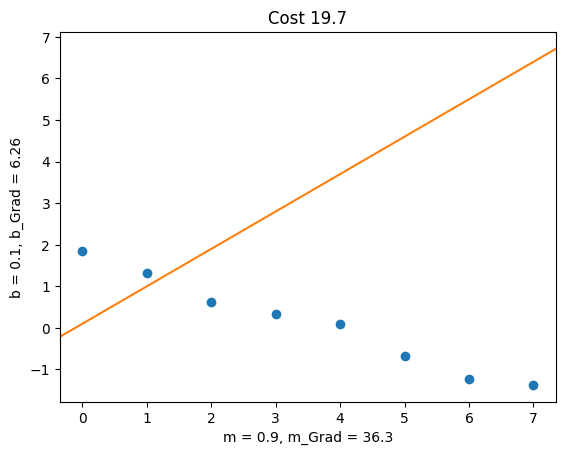

In [18]:
labeled_regression_plot(xs,ys,m,b,C)

##**Step4: Gradient Descent**

$\frac{\partial C}{\partial m} = 36.3$ indicates that an increase in $m$ corresponds to a large increase in $C$.

Meanwhile, $\frac{\partial C}{\partial b} = 6.26$ indicates that an increase in $b$ also corresponds to an increase in $C$, though much less so than $m$.

In the first round of training, the lowest hanging fruit with respect to reducing cost $C$ is therefore to decrease the slope of the regression line, $m$. There will also be a relatively small decrease in the $y$-intercept of the line, $b$.

In [19]:
optim = torch.optim.SGD([m,b],lr=0.01)

In [20]:
optim.step()

In [21]:
C = mse(regression(xs,m,b),ys)
C

tensor(8.5722, grad_fn=<DivBackward0>)

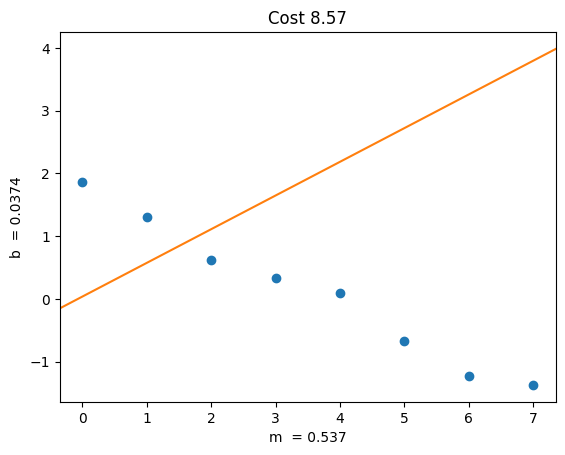

In [23]:
labeled_regression_plot(xs,ys,m,b,C,include_grad=False)

##**Rinse And Repeat**

In [25]:
epochs = 1000
for epoch in range(epochs):

  optim.zero_grad()  # reset gradients to zero; else they will accumulate

  yhats =  regression(xs,m,b) #Step 1
  C = mse(yhats,ys)  # Step 2

  C.backward()  # Step 3

  #labeled_regression_plot(xs,ys,m,b,C)

  optim.step()  ## step 4

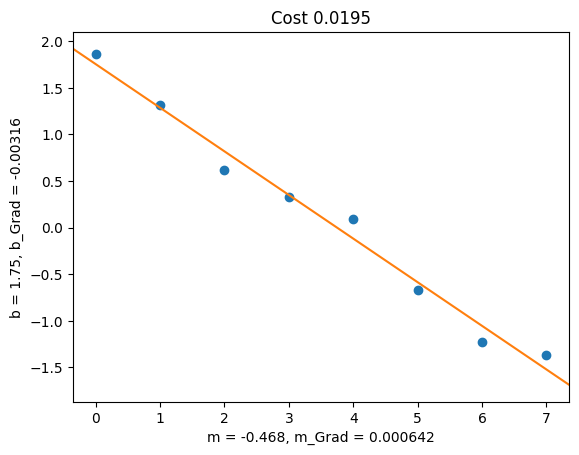

In [26]:
labeled_regression_plot(xs,ys,m,b,C)